<a href="https://colab.research.google.com/github/dravichi/CODSOFT/blob/main/Movie_Rating_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Movie Rating Prediction - Codsoft Internship**

**Importing Essential Libraries**

In [140]:
from google.colab import files
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Import Dataset**

In [14]:
files.upload()
df = pd.read_csv('IMDb Movies India.csv', encoding='latin-1')

Saving IMDb Movies India.csv to IMDb Movies India (3).csv


**Data Overview**

In [6]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [7]:
df.describe(include=object).T

,count,unique,top,freq
Name,15509,13838,Anjaam,7
Year,14981,102,(2019),410
Duration,7240,182,120 min,240
Genre,13632,485,Drama,2780
Votes,7920,2034,8,227
Director,14984,5938,Jayant Desai,58
Actor 1,13892,4718,Ashok Kumar,158
Actor 2,13125,4891,Rekha,83
Actor 3,12365,4820,Pran,91


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [9]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


**Dealing With Unnecessary Attributes**

In [192]:
df.drop(columns=['Name'], inplace=True)

**Dealing With Null Values**

In [193]:
df.isnull().sum().sort_values(ascending=False)

Duration    8269
Rating      7590
Votes       7589
Actor 3     3144
Actor 2     2384
Genre       1877
Actor 1     1617
Year         528
Director     525
dtype: int64

In [194]:
df['Duration'] = df['Duration'].str.replace('min', '').apply(pd.to_numeric)

df.drop(df[df['Votes'] == '$5.16M'].index, inplace=True)

df['Votes'] = df['Votes'].str.replace(',', '').apply(pd.to_numeric)

In [195]:
df['Rating'].fillna(df['Rating'].mean(), inplace=True)
df['Duration'].fillna(df['Duration'].mean(), inplace=True)
df['Votes'].fillna(df['Votes'].mean(), inplace=True)

df.dropna(subset=['Year', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre'], inplace=True)

**Dealing With Categorical Attributes**

In [196]:
df['Year'] = df['Year'].str.replace(r'\D', '', regex=True).astype(int)

In [197]:
actor1_encoded = df.groupby('Actor 1').agg({'Rating': 'mean'}).to_dict()['Rating']
actor2_encoded = df.groupby('Actor 2').agg({'Rating': 'mean'}).to_dict()['Rating']
actor3_encoded = df.groupby('Actor 3').agg({'Rating': 'mean'}).to_dict()['Rating']
director_encoded = df.groupby('Director').agg({'Rating': 'mean'}).to_dict()['Rating']
genre_encoded = df.groupby('Genre').agg({'Rating': 'mean'}).to_dict()['Rating']

In [198]:
df['Actor 1'] = round(df['Actor 1'].map(actor1_encoded), 2)
df['Actor 2'] = round(df['Actor 2'].map(actor2_encoded), 2)
df['Actor 3'] = round(df['Actor 3'].map(actor3_encoded), 2)
df['Director'] = round(df['Director'].map(director_encoded), 2)
df['Genre'] = round(df['Genre'].map(genre_encoded), 2)

**Relation Between Numerical Variables**

Text(0.5, 1.0, 'Relation Between Numerical Variables')

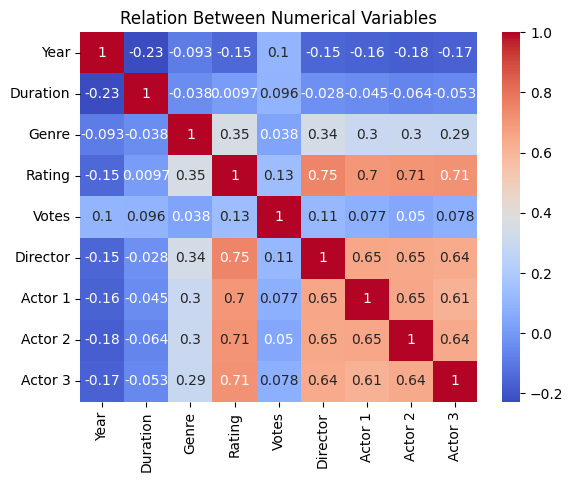

In [199]:
numerical = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(numerical, annot=True, cmap='coolwarm').set_title('Relation Between Numerical Variables')

**Splitting Dataset Into Training and Testing**

In [200]:
x = df.drop(columns=['Rating']).values
y = df['Rating'].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Training Dataset**

In [201]:
model = RandomForestRegressor()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

**Model Evaluation**

In [203]:
print(f'R2 Score: {round(r2_score(y_test, y_pred)*100, 2)}%')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')

R2 Score: 78.62%
Mean Squared Error: 0.27080612654034286
Mean Absolute Error: 0.30908136207472536


**Data Visualization**

[Text(0.5, 1.0, 'Actual vs Predicted Ratings'),
 Text(0.5, 0, 'Actual Ratings'),
 Text(0, 0.5, 'Predicted Ratings')]

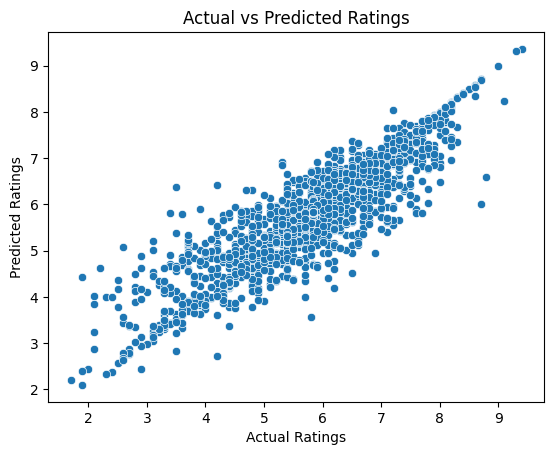

In [204]:
sns.scatterplot(x=y_test, y=y_pred).set(title='Actual vs Predicted Ratings', xlabel='Actual Ratings', ylabel='Predicted Ratings')